In [74]:
# Import all libraries that will be used to make the initial analysis
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go


### 
import os
import time 
import logging 
import threading
import csv
import math



In [2]:
data_previous_application = pd.read_csv("../../2-data/previous_application.csv")

In [3]:
#pd.set_option('display.height', 1000)
#pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 5)

In [4]:
print(data_previous_application.columns)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [5]:
data_previous_application.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# seleciona os campos que serao agrupados
filter_fields = ['SK_ID_CURR','SK_ID_PREV']

# aplica o agrupacao no data set com base na variavel "filter_fields" os campos os valores
# serao agrupados com base no SK_ID_CURR
data_gp = data_previous_application[filter_fields].groupby(['SK_ID_CURR']).count()

In [41]:
data_gp

,SK_ID_PREV
SK_ID_CURR,
100001,1
100002,1
...,...
456254,2
456255,8


In [42]:
# como pode ser visto no quadro acima o valor agrupado nao é apresentado como uma coluna
# dentro do data set com isso, sera necessario utilizar uma funcao nativa do pandas para alterar
#esse comportamento e retorna a SK_ID_CURR como uma coluna no data set.

data_gp.reset_index(level=['SK_ID_CURR'], inplace=True)
data_gp

,SK_ID_CURR,SK_ID_PREV
0,100001,1
1,100002,1
...,...,...
338855,456254,2
338856,456255,8


In [43]:
# atualizada o nome das colunas
data_gp.columns = ['SK_ID_CURR','QTD_SK_ID_PREV']
data_gp

,SK_ID_CURR,QTD_SK_ID_PREV
0,100001,1
1,100002,1
...,...,...
338855,456254,2
338856,456255,8


In [44]:

# ordena os dados pela coluna SK_ID_PREV
data_gp.sort_values(by=['QTD_SK_ID_PREV'])
data_gp





,SK_ID_CURR,QTD_SK_ID_PREV
0,100001,1
1,100002,1
...,...,...
338855,456254,2
338856,456255,8


In [30]:
data_gp

,SK_ID_CURR,QTD_SK_ID_PREV
0,100001,1
1,100002,1
...,...,...
338855,456254,2
338856,456255,8


In [47]:
# Filtra todos os registros referente ao SK_ID_CURR 187868 
# e que o campo NAME_CONTRACT_STATUS seja diferente de Refused
# note que cada comparacao esta dentro de chaves 
# e tambem eh utilizado o operador logico & para fazer a comparacao dos valores
# tambem eh possivel usar a funcao where existente dentro do pandas.

# esta eh apenas uma analise exploratoria dos dados para entender quais os valores

data_previous_application[
            (data_previous_application['SK_ID_CURR']==187868) 
            & (data_previous_application['NAME_CONTRACT_STATUS'] != 'Refused') ]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
170959,2636986,187868,Cash loans,NaN,0.0,0.0,NaN,NaN,WEDNESDAY,8,Y,1,NaN,NaN,NaN,XNA,Canceled,-479,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
176219,2672704,187868,Consumer loans,9558.630,44847.0,35874.0,8973.0,44847.0,FRIDAY,7,Y,1,0.217906,NaN,NaN,XAP,Approved,-1534,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,50,Connectivity,4.0,middle,POS mobile without interest,365243.0,-1503.0,-1413.0,-1413.0,-1405.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375891,1660097,187868,Consumer loans,11489.985,53955.0,63243.0,0.0,53955.0,SATURDAY,8,Y,1,0.000000,NaN,NaN,XAP,Approved,-581,XNA,XAP,NaN,Repeater,Computers,POS,XNA,Regional / Local,300,Consumer electronics,6.0,middle,POS household with interest,365243.0,-550.0,-400.0,-430.0,-426.0,0.0
1520847,2615246,187868,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,9,Y,1,NaN,NaN,NaN,XNA,Canceled,-46,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:

def group_fun(field):
    filter_fields = [field,'SK_ID_CURR']
    data_gp = data_previous_application[filter_fields].groupby([field]).count()
    data_gp.reset_index(level=0, inplace=True)
    return data_gp

def plot_info(labels, sizes, colors):
    labels = labels
    
    sizes = sizes
    colors = colors
    explode = None

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

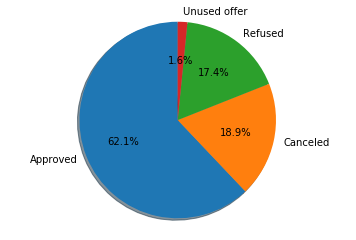

In [54]:
data_gp1 = group_fun('NAME_CONTRACT_STATUS')
plot_info(data_gp1['NAME_CONTRACT_STATUS'],data_gp1['SK_ID_CURR'],('blue', 'red','yellow','green'))

In [55]:
data_gp1

,NAME_CONTRACT_STATUS,SK_ID_CURR
0,Approved,1036781
1,Canceled,316319
2,Refused,290678
3,Unused offer,26436


In [56]:
data_previous_application['NAME_CONTRACT_TYPE']

0          Consumer loans
1              Cash loans
                ...      
1670212        Cash loans
1670213        Cash loans
Name: NAME_CONTRACT_TYPE, Length: 1670214, dtype: object

=== NAME_CONTRACT_TYPE====
  NAME_CONTRACT_TYPE  SK_ID_CURR
0         Cash loans      747553
1     Consumer loans      729151
2    Revolving loans      193164
3                XNA         346
adsf
asdf
=== NAME_CONTRACT_TYPE====



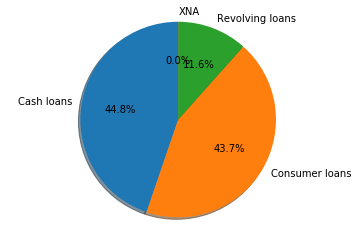

=== WEEKDAY_APPR_PROCESS_START====
   WEEKDAY_APPR_PROCESS_START  SK_ID_CURR
0                      FRIDAY      252048
1                      MONDAY      253557
..                        ...         ...
5                     TUESDAY      255118
6                   WEDNESDAY      255010

[7 rows x 2 columns]
adsf
asdf
=== WEEKDAY_APPR_PROCESS_START====



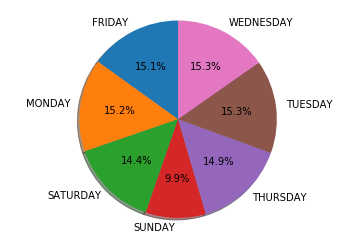

=== HOUR_APPR_PROCESS_START====
    HOUR_APPR_PROCESS_START  SK_ID_CURR
0                         0         109
1                         1         212
..                      ...         ...
22                       22         720
23                       23         202

[24 rows x 2 columns]
adsf
asdf
=== HOUR_APPR_PROCESS_START====



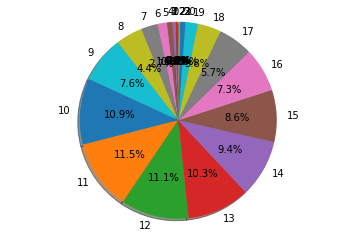

=== FLAG_LAST_APPL_PER_CONTRACT====
  FLAG_LAST_APPL_PER_CONTRACT  SK_ID_CURR
0                           N        8475
1                           Y     1661739
adsf
asdf
=== FLAG_LAST_APPL_PER_CONTRACT====



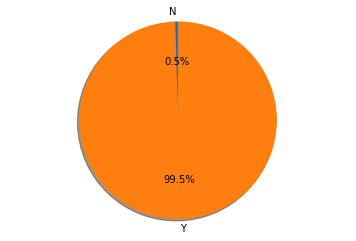

=== NFLAG_LAST_APPL_IN_DAY====
   NFLAG_LAST_APPL_IN_DAY  SK_ID_CURR
0                       0        5900
1                       1     1664314
adsf
asdf
=== NFLAG_LAST_APPL_IN_DAY====



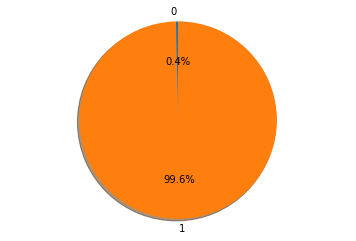

=== RATE_INTEREST_PRIMARY====
     RATE_INTEREST_PRIMARY  SK_ID_CURR
0                 0.034781           1
1                 0.059121           2
..                     ...         ...
146               0.902924           1
147               1.000000           1

[148 rows x 2 columns]
adsf
asdf
=== RATE_INTEREST_PRIMARY====



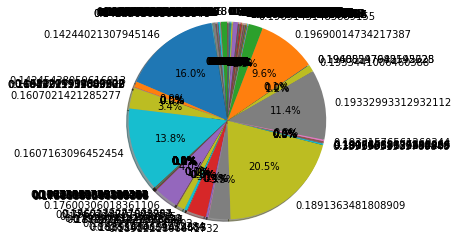

=== RATE_INTEREST_PRIVILEGED====
    RATE_INTEREST_PRIVILEGED  SK_ID_CURR
0                   0.373150           2
1                   0.424419          66
..                       ...         ...
23                  0.867336         931
24                  1.000000           1

[25 rows x 2 columns]
adsf
asdf
=== RATE_INTEREST_PRIVILEGED====



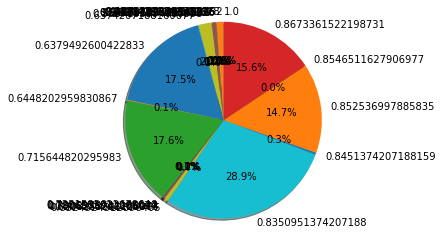

=== NAME_CASH_LOAN_PURPOSE====
          NAME_CASH_LOAN_PURPOSE  SK_ID_CURR
0   Building a house or an annex        2693
1           Business development         426
..                           ...         ...
23                           XAP      922661
24                           XNA      677918

[25 rows x 2 columns]
adsf
asdf
=== NAME_CASH_LOAN_PURPOSE====



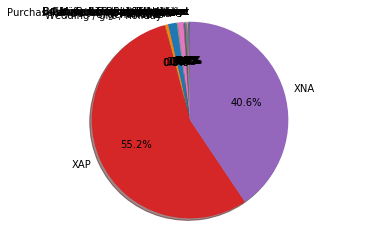

=== NAME_CONTRACT_STATUS====
  NAME_CONTRACT_STATUS  SK_ID_CURR
0             Approved     1036781
1             Canceled      316319
2              Refused      290678
3         Unused offer       26436
adsf
asdf
=== NAME_CONTRACT_STATUS====



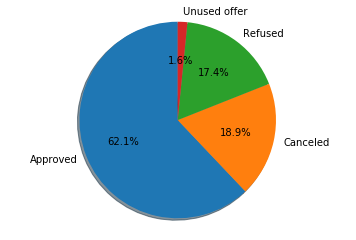

=== NAME_PAYMENT_TYPE====
                           NAME_PAYMENT_TYPE  SK_ID_CURR
0                      Cash through the bank     1033552
1  Cashless from the account of the employer        1085
2                 Non-cash from your account        8193
3                                        XNA      627384
adsf
asdf
=== NAME_PAYMENT_TYPE====



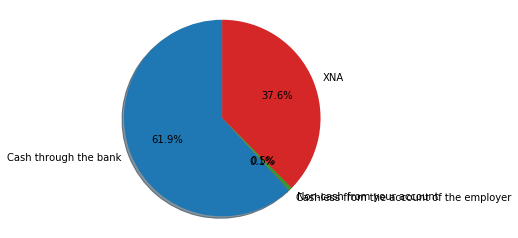

=== CODE_REJECT_REASON====
   CODE_REJECT_REASON  SK_ID_CURR
0              CLIENT       26436
1                  HC      175231
..                ...         ...
7                 XAP     1353093
8                 XNA        5244

[9 rows x 2 columns]
adsf
asdf
=== CODE_REJECT_REASON====



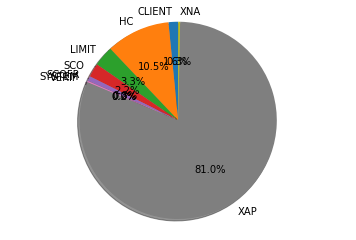

=== NAME_TYPE_SUITE====
    NAME_TYPE_SUITE  SK_ID_CURR
0          Children       31566
1            Family      213263
..              ...         ...
5   Spouse, partner       67069
6     Unaccompanied      508970

[7 rows x 2 columns]
adsf
asdf
=== NAME_TYPE_SUITE====



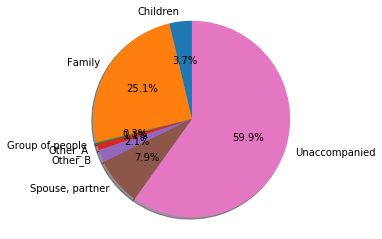

=== NAME_CLIENT_TYPE====
  NAME_CLIENT_TYPE  SK_ID_CURR
0              New      301363
1        Refreshed      135649
2         Repeater     1231261
3              XNA        1941
adsf
asdf
=== NAME_CLIENT_TYPE====



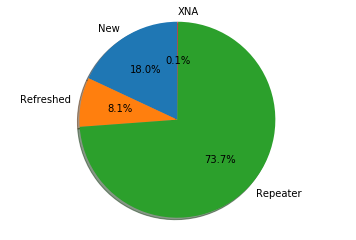

=== NAME_GOODS_CATEGORY====
   NAME_GOODS_CATEGORY  SK_ID_CURR
0   Additional Service         128
1              Animals           1
..                 ...         ...
26              Weapon          77
27                 XNA      950809

[28 rows x 2 columns]
adsf
asdf
=== NAME_GOODS_CATEGORY====



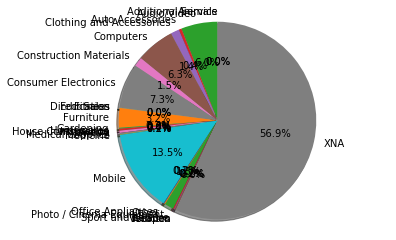

=== NAME_PORTFOLIO====
  NAME_PORTFOLIO  SK_ID_CURR
0          Cards      144985
1           Cars         425
2           Cash      461563
3            POS      691011
4            XNA      372230
adsf
asdf
=== NAME_PORTFOLIO====



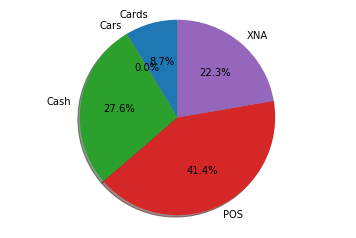

=== NAME_PRODUCT_TYPE====
  NAME_PRODUCT_TYPE  SK_ID_CURR
0               XNA     1063666
1           walk-in      150261
2            x-sell      456287
adsf
asdf
=== NAME_PRODUCT_TYPE====



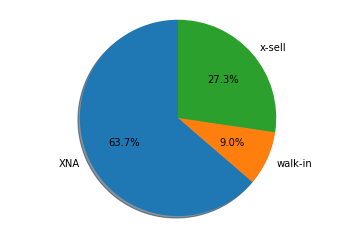

=== CHANNEL_TYPE====
        CHANNEL_TYPE  SK_ID_CURR
0    AP+ (Cash loan)       57046
1         Car dealer         452
..               ...         ...
6   Regional / Local      108528
7              Stone      212083

[8 rows x 2 columns]
adsf
asdf
=== CHANNEL_TYPE====



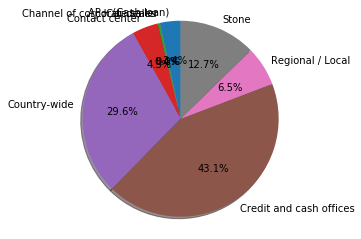

=== NAME_SELLER_INDUSTRY====
   NAME_SELLER_INDUSTRY  SK_ID_CURR
0       Auto technology        4990
1              Clothing       23949
..                  ...         ...
9               Tourism         513
10                  XNA      855720

[11 rows x 2 columns]
adsf
asdf
=== NAME_SELLER_INDUSTRY====



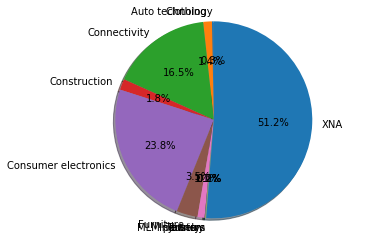

=== CNT_PAYMENT====
    CNT_PAYMENT  SK_ID_CURR
0           0.0      144985
1           3.0        1100
..          ...         ...
47         72.0         139
48         84.0          45

[49 rows x 2 columns]
adsf
asdf
=== CNT_PAYMENT====



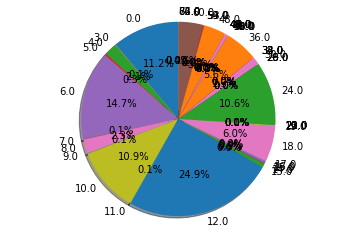

=== NAME_YIELD_GROUP====
  NAME_YIELD_GROUP  SK_ID_CURR
0              XNA      517215
1             high      353331
2       low_action       92041
3       low_normal      322095
4           middle      385532
adsf
asdf
=== NAME_YIELD_GROUP====



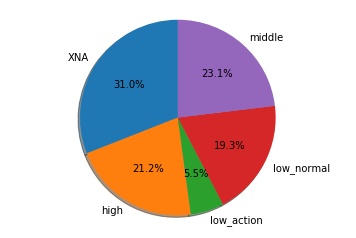

=== PRODUCT_COMBINATION====
            PRODUCT_COMBINATION  SK_ID_CURR
0                   Card Street      112582
1                   Card X-Sell       80582
..                          ...         ...
15      POS other with interest       23879
16  POS others without interest        2555

[17 rows x 2 columns]
adsf
asdf
=== PRODUCT_COMBINATION====



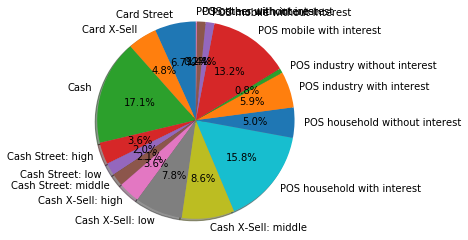

=== NFLAG_INSURED_ON_APPROVAL====
   NFLAG_INSURED_ON_APPROVAL  SK_ID_CURR
0                        0.0      665527
1                        1.0      331622
adsf
asdf
=== NFLAG_INSURED_ON_APPROVAL====



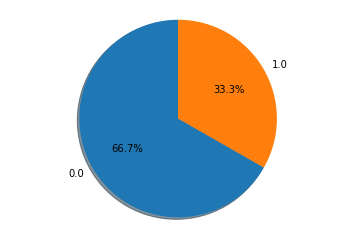

In [77]:
# apresentar os campos onde os valores distintos nao ultrapassem o valor de 200
# cada campo sera paresentado com um quadro resumido e um grafico
# campos com um valor alto de registros distintos inicialmente nao serao considerados no 
# data set que sera processado.


for column in data_previous_application.columns:

    if column != 'SK_ID_CURR':
        data_gp1 = group_fun(column)
        d = data_gp1.count()
        dd = d['SK_ID_CURR']
        if dd <= 200: 
            print('=== {}===='.format(column))
            print(data_gp1)
            print('adsf')

            print('asdf')
            print('=== {}===='.format(column))
            print()
        
            plot_info(data_gp1[column],data_gp1['SK_ID_CURR'],np.random.rand(4,1))
    